In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
def convert_to_yolo_format(bbox, image_width, image_height):
    x, y, width, height = bbox
    center_x = x + width / 2
    center_y = y + height / 2
    return [center_x, center_y, width, height]

In [3]:
imp_species = ['Bird', 'Coyote', 'Domestic cat', 'Domestic dog', 'Eastern chipmunk', 'Eastern cottontail rabbit', 
               'Eastern gray squirrel', 'Gray fox', 'Groundhog', 'Human', 'Mouse species', 'Raccoon', 'Red fox', 
               'Striped skunk', 'Vehicle', 'Virginia opossum', 'White-tailed deer']

In [4]:
csv_files_dir = r"D:\UWIN Tagged Photos Outputs\single box images"

In [5]:
csv_files = os.listdir(csv_files_dir)

In [6]:
csv_files[13]

'batch_014.csv'

In [7]:
data = pd.read_csv(os.path.join(csv_files_dir, csv_files[13]))

In [8]:
data

,photoName,speciesID,species,x,y,w,h
0,VID34099-00037.jpg,4,White-tailed deer,0.2880,0.5298,0.16340,0.13970
1,VID34099-00040.jpg,4,White-tailed deer,0.3390,0.5112,0.16600,0.13430
2,VID34099-00041.jpg,4,White-tailed deer,0.3607,0.5041,0.17220,0.11280
3,VID34099-00042.jpg,4,White-tailed deer,0.3603,0.5121,0.16450,0.11170
4,VID34099-00044.jpg,4,White-tailed deer,0.1976,0.5112,0.17580,0.14570
...,...,...,...,...,...,...,...
960,VID32814-00878.jpg,2,Eastern gray squirrel,0.6555,0.4580,0.04994,0.03873
961,VID32814-00884.jpg,2,Eastern gray squirrel,0.7204,0.4530,0.05437,0.07081
962,VID32814-00885.jpg,2,Eastern gray squirrel,0.7205,0.4539,0.05348,0.07014
963,VID32814-00892.jpg,2,Eastern gray squirrel,0.6826,0.4435,0.05082,0.06831


In [9]:
data.dropna(subset=['species'], inplace=True)

In [10]:
data

,photoName,speciesID,species,x,y,w,h
0,VID34099-00037.jpg,4,White-tailed deer,0.2880,0.5298,0.16340,0.13970
1,VID34099-00040.jpg,4,White-tailed deer,0.3390,0.5112,0.16600,0.13430
2,VID34099-00041.jpg,4,White-tailed deer,0.3607,0.5041,0.17220,0.11280
3,VID34099-00042.jpg,4,White-tailed deer,0.3603,0.5121,0.16450,0.11170
4,VID34099-00044.jpg,4,White-tailed deer,0.1976,0.5112,0.17580,0.14570
...,...,...,...,...,...,...,...
960,VID32814-00878.jpg,2,Eastern gray squirrel,0.6555,0.4580,0.04994,0.03873
961,VID32814-00884.jpg,2,Eastern gray squirrel,0.7204,0.4530,0.05437,0.07081
962,VID32814-00885.jpg,2,Eastern gray squirrel,0.7205,0.4539,0.05348,0.07014
963,VID32814-00892.jpg,2,Eastern gray squirrel,0.6826,0.4435,0.05082,0.06831


In [11]:
pd.unique(data['species'])

array(['White-tailed deer', 'Human', 'Cannot ID', 'Domestic cat',
       'Eastern cottontail rabbit', 'Raccoon', 'Eastern gray squirrel',
       'Groundhog', 'American robin', 'Red fox', 'Coyote'], dtype=object)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

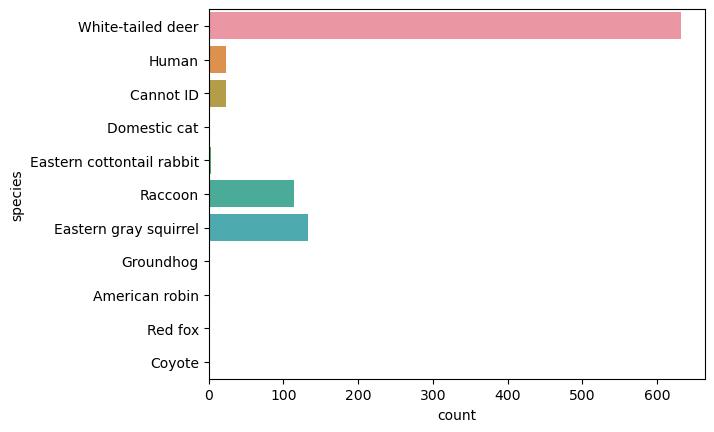

In [13]:
sns.countplot(y=data['species'])
plt.savefig('./counts/batch_014.jpg', dpi=400)

In [14]:
# data[data['species'].isin(imp_species)]

In [15]:
pd.unique(data[data['species'].isin(imp_species)]['species'])

array(['White-tailed deer', 'Human', 'Domestic cat',
       'Eastern cottontail rabbit', 'Raccoon', 'Eastern gray squirrel',
       'Groundhog', 'Red fox', 'Coyote'], dtype=object)

In [16]:
data = data[data['species'].isin(imp_species)]

In [17]:
data

,photoName,speciesID,species,x,y,w,h
0,VID34099-00037.jpg,4,White-tailed deer,0.2880,0.5298,0.16340,0.13970
1,VID34099-00040.jpg,4,White-tailed deer,0.3390,0.5112,0.16600,0.13430
2,VID34099-00041.jpg,4,White-tailed deer,0.3607,0.5041,0.17220,0.11280
3,VID34099-00042.jpg,4,White-tailed deer,0.3603,0.5121,0.16450,0.11170
4,VID34099-00044.jpg,4,White-tailed deer,0.1976,0.5112,0.17580,0.14570
...,...,...,...,...,...,...,...
960,VID32814-00878.jpg,2,Eastern gray squirrel,0.6555,0.4580,0.04994,0.03873
961,VID32814-00884.jpg,2,Eastern gray squirrel,0.7204,0.4530,0.05437,0.07081
962,VID32814-00885.jpg,2,Eastern gray squirrel,0.7205,0.4539,0.05348,0.07014
963,VID32814-00892.jpg,2,Eastern gray squirrel,0.6826,0.4435,0.05082,0.06831


In [18]:
photo_abs_path = [os.path.join(r"\\vector.e3b.columbia.edu\e3b\Globus Database\UWIN Tagged Photos\batch_014", i) for i in list(data['photoName'])]

In [19]:
photo_abs_path

['\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00037.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00040.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00041.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00042.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00044.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00045.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00046.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00047.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UWIN Tagged Photos\\batch_014\\VID34099-00048.jpg',
 '\\\\vector.e3b.columbia.edu\\e3b\\Globus Database\\UW

In [20]:
data['photoAbsPath'] = photo_abs_path

C:\Users\ab5640\AppData\Local\Temp\ipykernel_15428\2180535400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['photoAbsPath'] = photo_abs_path


In [21]:
data

,photoName,speciesID,species,x,y,w,h,photoAbsPath
0,VID34099-00037.jpg,4,White-tailed deer,0.2880,0.5298,0.16340,0.13970,\\vector.e3b.columbia.edu\e3b\Globus Database\...
1,VID34099-00040.jpg,4,White-tailed deer,0.3390,0.5112,0.16600,0.13430,\\vector.e3b.columbia.edu\e3b\Globus Database\...
2,VID34099-00041.jpg,4,White-tailed deer,0.3607,0.5041,0.17220,0.11280,\\vector.e3b.columbia.edu\e3b\Globus Database\...
3,VID34099-00042.jpg,4,White-tailed deer,0.3603,0.5121,0.16450,0.11170,\\vector.e3b.columbia.edu\e3b\Globus Database\...
4,VID34099-00044.jpg,4,White-tailed deer,0.1976,0.5112,0.17580,0.14570,\\vector.e3b.columbia.edu\e3b\Globus Database\...
...,...,...,...,...,...,...,...,...
960,VID32814-00878.jpg,2,Eastern gray squirrel,0.6555,0.4580,0.04994,0.03873,\\vector.e3b.columbia.edu\e3b\Globus Database\...
961,VID32814-00884.jpg,2,Eastern gray squirrel,0.7204,0.4530,0.05437,0.07081,\\vector.e3b.columbia.edu\e3b\Globus Database\...
962,VID32814-00885.jpg,2,Eastern gray squirrel,0.7205,0.4539,0.05348,0.07014,\\vector.e3b.columbia.edu\e3b\Globus Database\...
963,VID32814-00892.jpg,2,Eastern gray squirrel,0.6826,0.4435,0.05082,0.06831,\\vector.e3b.columbia.edu\e3b\Globus Database\...


In [22]:
data.to_csv(r"D:\UWIN Tagged Photos Outputs\yolo_formatted_csv\batch_014.csv", index=False)

In [23]:
# total images check

path = r"D:\UWIN Tagged Photos Outputs\yolo_formatted_csv"

files = [os.path.join(path, i) for i in os.listdir(path)]

t = 0
for i in files:
    d = pd.read_csv(i)
    t += d.shape[0]

print(f'Total {t} images found with single bounding boxes.')

Total 29716 images found with single bounding boxes.
